# Donkey Car Training using Google Colab

Train your donkey car model using accelerated GPU for FREE on Google Colab

## Check GPU allocation
If "Found GPU at: / device: GPU: 0" is displayed, the GPU is ready to use.

In [1]:
import tensorflow
print(tensorflow.__version__)

2.8.2


## Git Clone the donkey repository

In [2]:
!git clone https://github.com/autorope/donkeycar.git 
%cd /content/donkeycar

!git checkout master

Cloning into 'donkeycar'...
remote: Enumerating objects: 15211, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15211 (delta 1), reused 3 (delta 0), pack-reused 15202
Receiving objects: 100% (15211/15211), 89.53 MiB | 16.85 MiB/s, done.
Resolving deltas: 100% (10081/10081), done.
/content/donkeycar
Branch 'master' set up to track remote branch 'master' from 'origin'.
Switched to a new branch 'master'


## Install donkey car

In [3]:
!pip3 install -e .[pc]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/donkeycar
     |████████████████████████████████| 99 kB 9.1 MB/s 
     |████████████████████████████████| 865 kB 35.9 MB/s 
     |████████████████████████████████| 29.5 MB 79.1 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=5927c862aa60aa20af250b107eebe02f6d8be290e32ea34f5a046a78986bc34f
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62133 sha256=8268732c50dcb77cc0e4a8248747f571b278bb1833f2e80e651dfe5320b600c1
  Stored in directory: /root/.cache/pip/wheels/d0/bf/ac/2b3f43f8c6fcd0f4ba5395397458c521eb0b52d33b574a5a40
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9632 sha256=938cf065b91d307d1c9b81db1115c5333f2425db7514e40106cb8506222234e1
  Stored in direc

## Create Project

In [4]:
!donkey createcar --path /content/mycar

________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v4.2.1 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying calibrate script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


## Prepare Data
### Copy the following code and run on pi


```bash
cd ~/mycar/data
tar -czf tub_xx_yyyy_mm_dd.tar.gz tub_xx_yyyy_mm_dd

```

This will create a tub_xx_yyyy_mm_dd.tar.gz file under ~/mycar/data

## Upload Data


### Copy the tub to your local pc

Run this on your local pc if you are using linux/mac
```
sftp pi@raspberry.local
cd ~/mycar/data
get tub_xx_yyyy_mm_dd.tar.gz
```

If you are on a windows, download sftp utility like [filezilla](https://filezilla-project.org/) or [putty](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html)

### Define your tub name here

In [5]:
tub_name="tub_25_22-09-04"

### Upload the tub to Google Drive

First upload the tub_x_yyyy_mm_dd.tar.gz to Google Drive. We will then mount Google Drive from colab and copy the data from Drive directly. When you run the cell below, you will need to click the link and generate an authorization code to for colab to access your drive.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Suppose you upload the tub_xx_yyyy_mm_dd.tar.gz to Google Drive/mycar/tub_xx_yyyy_mm_dd.tar.gz, this is how you copy it from Google Drive to colab

In [7]:
%cd /content/mycar/data
!cp /content/drive/My\ Drive/donkey_car/{tub_name}.tar.gz .

/content/mycar/data


And untar it to the right place

In [8]:
!tar -xzf {tub_name}.tar.gz

Check whether the data is there

In [9]:
!ls {tub_name}

catalog_0.catalog	    catalog_5.catalog
catalog_0.catalog_manifest  catalog_5.catalog_manifest
catalog_1.catalog	    catalog_6.catalog
catalog_1.catalog_manifest  catalog_6.catalog_manifest
catalog_2.catalog	    catalog_7.catalog
catalog_2.catalog_manifest  catalog_7.catalog_manifest
catalog_3.catalog	    catalog_8.catalog
catalog_3.catalog_manifest  catalog_8.catalog_manifest
catalog_4.catalog	    images
catalog_4.catalog_manifest  manifest.json


## Train your model

In [16]:
!python /content/mycar/train.py --tubs={tub_name} --type linear --model mypilot.h5

________             ______                   _________              
___  __ \_______________  /___________  __    __  ____/_____ ________
__  / / /  __ \_  __ \_  //_/  _ \_  / / /    _  /    _  __ `/_  ___/
_  /_/ // /_/ /  / / /  ,<  /  __/  /_/ /     / /___  / /_/ /_  /    
/_____/ \____//_/ /_//_/|_| \___/_\__, /      \____/  \__,_/ /_/     
                                 /____/                              

using donkey v4.2.1 ...
loading config file: /content/mycar/config.py
loading personal config over-rides from myconfig.py
"get_model_by_type" model Type is: linear
Created KerasLinear
2022-09-07 01:13:50.463171: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #   

Check if the model is generated



In [20]:
!ls -alh /content/mycar/data

total 37M
drwxr-xr-x 3 root root 4.0K Sep  7 01:15 .
drwxr-xr-x 5 root root 4.0K Sep  7 01:08 ..
-rw-r--r-- 1 root root 9.5M Sep  7 01:15 mypilot.h5
-rw-r--r-- 1 root root  26K Sep  7 01:15 mypilot.png
drwxrwxr-x 3 1000 1000 4.0K Sep  5 02:40 tub_25_22-09-04
-rw------- 1 root root  27M Sep  7 01:09 tub_25_22-09-04.tar.gz


/content/mycar/data


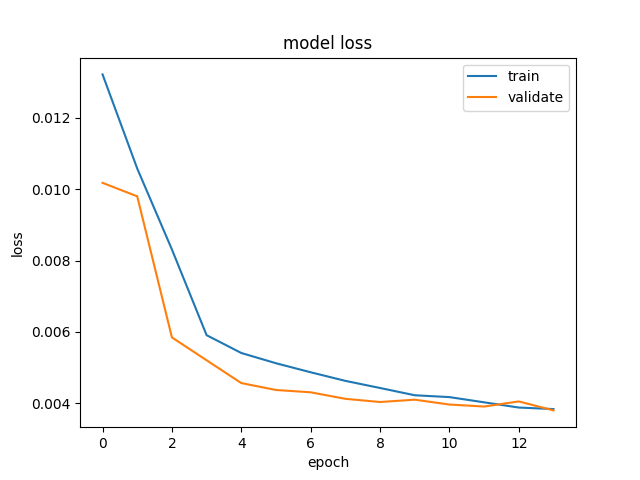

In [19]:
%cd /content/mycar/data

import glob
file = glob.glob("*.png")
  
from IPython.display import Image
Image(file[0])

## Copy the trained model back to Donkey Car (Pi)

Once the training is complete on colab, download the model file under /content/mycar/models/ folder location.

In [21]:
from google.colab import files

files.download('./mypilot.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Alternatively, you can copy the model back to Google Drive too

In [22]:
!cp /content/mycar/data/mypilot.h5 /content/drive/My\ Drive/donkey_car/models/mypilot.h5